In [1]:
import gzip
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:

fontsize = 18
def hist1d(x1,x2,xlabel:str = '',density = True, bins = 'auto'):
    plt.figure(figsize=(8, 6))
    #bins = np.linspace(0, max(np.max(x1),np.max(x2)), 50) if predefined_bins else 'auto'
    n1, bins, patches = plt.hist(x1, bins=bins, density=density, histtype='step', label='Independent Geant4', color='orange', linewidth=2.5)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    errors1 = np.sqrt(n1)
    if not density: plt.errorbar(bin_centers, n1, yerr=errors1, color='orange',fmt='none')
    n2, _, _ = plt.hist(x2, bins=bins, density=density, histtype='step', label='FairShip', color='blue')
    errors2 = np.sqrt(n2)
    if not density: plt.errorbar(bin_centers, n2, yerr=errors2, color='blue',fmt='none')
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.tight_layout()
    plt.tick_params(axis='both', which='major', labelsize=fontsize)  # Major ticks
    plt.tick_params(axis='both', which='minor', labelsize=fontsize)  # Minor ticks (if needed)




def hist2d(x, x_fs, fontsize=12):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True, sharex=True)
    fig.tight_layout()

    # First histogram (Enriched Sample)
    h1, xedges, yedges, im1 = axes[0].hist2d(*x, bins=50, cmap='viridis', norm=LogNorm(), density=False)
    axes[0].set_xlabel('$|P|$ [GeV]', fontsize=fontsize)
    axes[0].set_ylabel('$P_t$ [GeV]', fontsize=fontsize)
    axes[0].set_title('Enriched Sample', fontsize=fontsize)
    cbar1 = fig.colorbar(im1, ax=axes[0], label='Density')

    # Second histogram (Full Sample)
    h2, _, _, im2 = axes[1].hist2d(*x_fs, bins=[xedges, yedges], cmap='viridis', norm=LogNorm(), density=False)
    axes[1].set_xlabel('$|P|$ [GeV]', fontsize=fontsize)
    axes[1].set_title('Full Sample', fontsize=fontsize)
    cbar2 = fig.colorbar(im2, ax=axes[1], label='Density')

    # Adjust tick parameters
    for ax in axes:
        ax.tick_params(axis='both', which='major', labelsize=fontsize)
        ax.tick_params(axis='both', which='minor', labelsize=fontsize)

    plt.show()

def difference_hist1d(x1,x2,xlabel:str = '',density = True, bins = 'auto'):
    n1, bins, patches = plt.hist(x1, bins=bins, density=density, histtype='step', label='Independent Geant4', color='orange', linewidth=2.5)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    n2, _, _ = plt.hist(x2, bins=bins, density=density, histtype='step', label='FairShip', color='blue')
    diff = n1-n2
    plt.close()
    bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Calculate bin centers for plotting

    plt.figure(figsize=(8, 6))
    plt.bar(bin_centers, diff, width=np.diff(bins), color='blue', edgecolor='black', alpha=0.7)

    plt.xlabel(xlabel,fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.tight_layout()
    plt.tick_params(axis='both', which='major', labelsize=fontsize)  # Major ticks
    plt.tick_params(axis='both', which='minor', labelsize=fontsize)  # Minor ticks (if needed)


In [3]:
def extract_number_from_string(s):
    number_str = ''
    for char in s:
        if char.isdigit(): 
            number_str += char
    return int(number_str)

In [4]:
folder = '/home/hep/lprate/projects/MuonsAndMatter/data/outputs/'
file_name = 'output_snoopy_optim_9_subsample_biased.pkl'
with open(os.path.join(folder,file_name), 'rb') as f:
    data = pickle.load(f)
print(data.shape)

for i in data:
    print(i['px'].shape)
    break

(26492,)
(2550,)


In [5]:
x = []
y = []
z = []
px = []
py = []
pz = []
pdg = []
x_sens = []
y_sens = []
px_sens = []
py_sens = []
pz_sens = []
for i in data:
    if np.abs(i['pdg_id']).astype(int) != 13: continue
    x.append(i['x'])
    y.append(i['y'])
    z.append(i['z'])
    px.append(i['px'])
    py.append(i['py'])
    pz.append(i['pz'])
    pdg.append(i['pdg_id']) 
    assert (i['z'][-1]<83) & (i['z'][-1]>81), f"Z coordinate out of sens plane: {i['z'][-1]}"
    x_sens.append(i['x'][-1])
    y_sens.append(i['y'][-1])
    px_sens.append(i['px'][-1])
    py_sens.append(i['py'][-1])
    pz_sens.append(i['pz'][-1])
p_sens = np.sqrt(np.array(px_sens)**2 + np.array(py_sens)**2 + np.array(pz_sens)**2)
mask_t1 = (np.abs(x_sens)<2)&(np.abs(y_sens)<3)
number_of_hits = sum(mask_t1)
print(f"Number of hits: {number_of_hits}")

Number of hits: 37


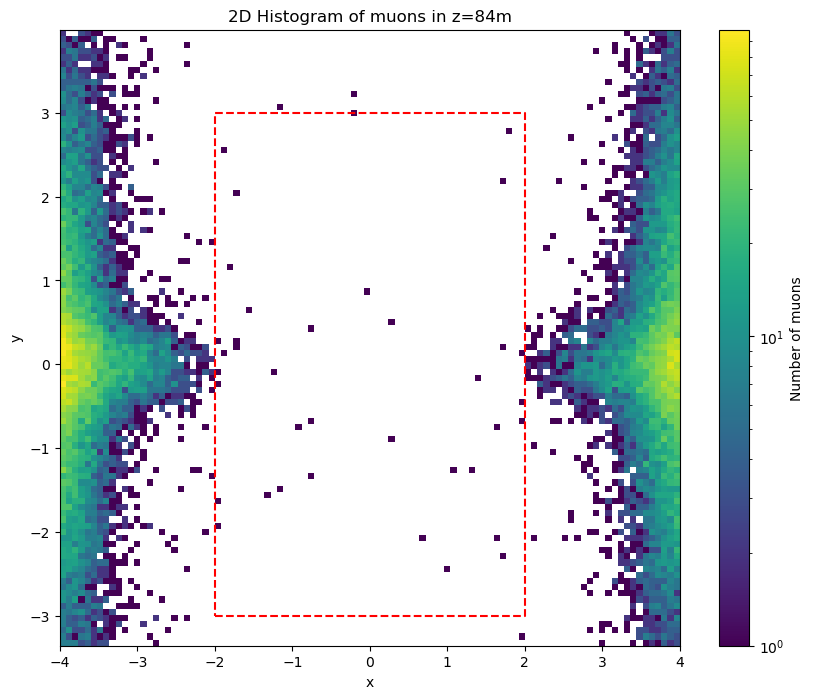

In [6]:
plt.figure(figsize=(10, 8))
plt.hist2d(x_sens, y_sens, bins=100,  cmap='viridis', norm=LogNorm())
plt.colorbar(label='Number of muons')
plt.plot([-2, 2, 2, -2, -2], [-3, -3, 3, 3, -3], color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Histogram of muons in z=84m')
plt.show()

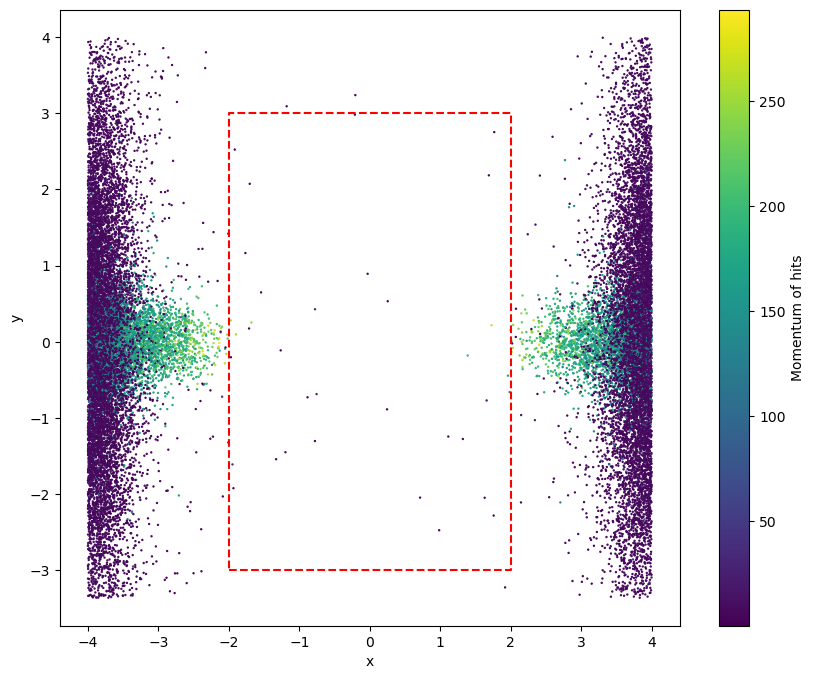

In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(x_sens, y_sens, s = 0.5, c=p_sens, cmap='viridis')
plt.colorbar(label='Momentum of hits')
plt.plot([-2, 2, 2, -2, -2], [-3, -3, 3, 3, -3], color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.show()